In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Load data
with open('mnist.pkl', 'rb') as f:
    data = pickle.load(f)
    
images = data['images']
labels = data['labels']

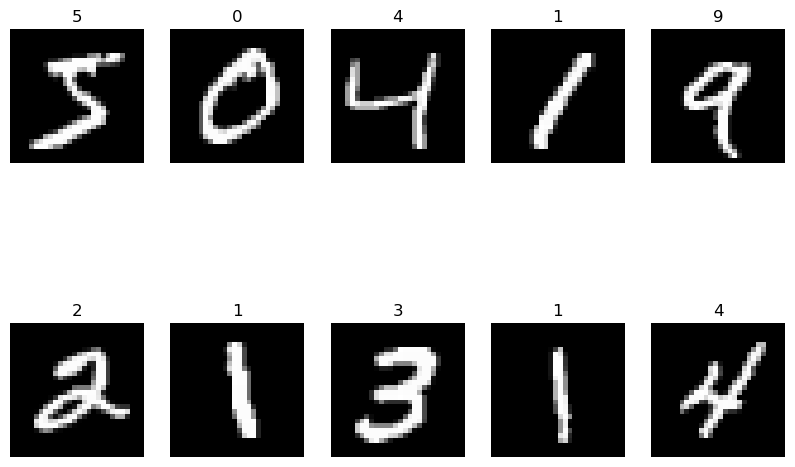

In [3]:
# Visualize some images
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

In [4]:
# Data Preprocessing
images = images.reshape((-1, 28 ** 2)) / 255.0
labels = torch.tensor(labels, dtype = torch.long) # Labels as integers

In [5]:
# Create PyTorch Dataset and DataLoader
X = torch.tensor(images, dtype=torch.float32)
dataset = TensorDataset(X, labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [6]:
# Defining the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(784, 600)  # Input -> Hidden Layer
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(600, 10)   # Hidden -> Output Layer

    def forward(self, x):
        x = self.relu(self.layer1(x))
        return self.layer2(x)  # No softmax; handled in loss function

In [7]:
# Initializing the Model, Loss, and Optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()  # Handles integer labels directly
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for batch_X, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(dataloader):.4f}')

Epoch [1/20], Loss: 2.0997
Epoch [2/20], Loss: 1.5755
Epoch [3/20], Loss: 1.0996
Epoch [4/20], Loss: 0.8280
Epoch [5/20], Loss: 0.6802
Epoch [6/20], Loss: 0.5931
Epoch [7/20], Loss: 0.5304
Epoch [8/20], Loss: 0.4892
Epoch [9/20], Loss: 0.4579
Epoch [10/20], Loss: 0.4316
Epoch [11/20], Loss: 0.4122
Epoch [12/20], Loss: 0.3967
Epoch [13/20], Loss: 0.3844
Epoch [14/20], Loss: 0.3708
Epoch [15/20], Loss: 0.3617
Epoch [16/20], Loss: 0.3550
Epoch [17/20], Loss: 0.3453
Epoch [18/20], Loss: 0.3395
Epoch [19/20], Loss: 0.3293
Epoch [20/20], Loss: 0.3240


In [10]:
# Evaluating the model
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

# Evaluate the model
evaluate(model, dataloader)

Accuracy: 91.21%
